## ADS1115 and Semitec 103AT-2 Thermistor  
Using the ADS1115 and Semitec 103AT-2 Thermistor to measure temperature.

Manufacturer Links:  
www.ti.com/product/ADS1115  
http://www.semitec.co.jp/uploads/english/sites/2/2017/03/P12-13-AT-Thermistor.pdf


Breakout Board Used: https://www.adafruit.com/product/1085

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from meerkat import base, ads, parser, thermistor

In [2]:
time = base.time

In [3]:
dev = ads.ADS1115(bus_n=1)

In [4]:
dev.pga('6.144')  # Other options: '6.144', '4.096'
dev.mux('0G')     # pin 0 relative to ground
dev.get_config()
dev.voltage()

1.023375

In [5]:
#dev.pga('6.144')  # Other options: '6.144', '4.096'
dev.mux('1G')     # pin 0 relative to ground
dev.get_config()
dev.voltage()

1.0235625

In [6]:
dev.voltage()

1.0235625

In [7]:
def R2(R1, Vin, Vout):
    """Voltage divider, unknown resistance with known resistance and voltages"""
    return R1 * (1 / ((Vin/Vout) - 1))

In [8]:
# delay between reads and writes sometimes need to be increased
dev.delay = 0.1

# get voltages of pins
dev.mux('1G')     # pin 0 relative to ground
Vcc = dev.voltage()
time.sleep(1)
print('Measured Source voltage: {} V'.format(Vcc))
dev.mux('2G')     # pin 1 relative to ground
Vt = dev.voltage()
print('Measured Thermistor voltage: {} V'.format(Vt))

# calculate resistance of thermistor
Rt = R2(R1=10000, Vin=Vcc, Vout=Vt)
print('Measured resistance: {} ohms'.format(Rt))

# Thermistor is a Semitec 103AT-2 values from datasheet

# these steps would be done once
s103AT = thermistor.Semitec103AT()
A = thermistor.compose_array(*s103AT.find_nearest(Rt))
abc = thermistor.gauss(A)

tC = thermistor.steinhart_hart(Rt, *abc)
print('Measured temperature: {:6.2f} C'.format(tC))

Measured Source voltage: 2.047875 V
Measured Thermistor voltage: 1.0235625 V
Measured resistance: 9992.678015742265 ohms
Measured temperature:  25.02 C


In [9]:
samples = 2000

In [10]:
data = []
for _ in range(samples):
    v = dev.voltage()
    r = R2(R1=10000, Vin=Vcc, Vout=v)
    T = thermistor.steinhart_hart(r, *abc)
    data.append([v, r, T])
    time.sleep(1)

In [11]:
df = pd.DataFrame(data, columns=['voltage', 'resistance', 'temperature_C'])

In [12]:
df.head()

,voltage,resistance,temperature_C
0,1.023562,9992.678016,25.01956
1,1.023562,9992.678016,25.01956
2,1.023750,9996.338338,25.00978
3,1.023750,9996.338338,25.00978
4,1.023937,10000.000000,25.00000


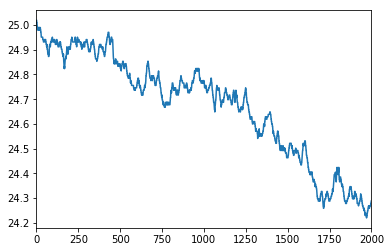

In [13]:
df.temperature_C.plot();